In [25]:
from duckduckgo_search import DDGS #Enable image search using duckduckgo API
from fastcore.all import * #a library made by fastai that have several feature and make programming easier
def search_images(keywords, max_images=500): # a function for changing and finding images and store the result(key words and Url) in the fastcore.L obgect
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image') #itemgot remove "image" grom each dictionery

In [26]:
searches = 'man','woman'
path = Path('man_or_woman') #this define two folder in this path

for o in searches:
    dest = (path/o) #for each elenent in searches make a subdirectory
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo')) #downl oad images 
    time.sleep(5) #wair for 5 second between each requests
    resize_images(path/o, max_size=400, dest=path/o) #resize all the images

In [27]:
failed = verify_images(get_image_files(path)) #scans the path directory and detect if any iamage is failed then stored them in failed list
failed.map(Path.unlink) #soring an a diffrent method them remove them from filesystem
len(failed)

36

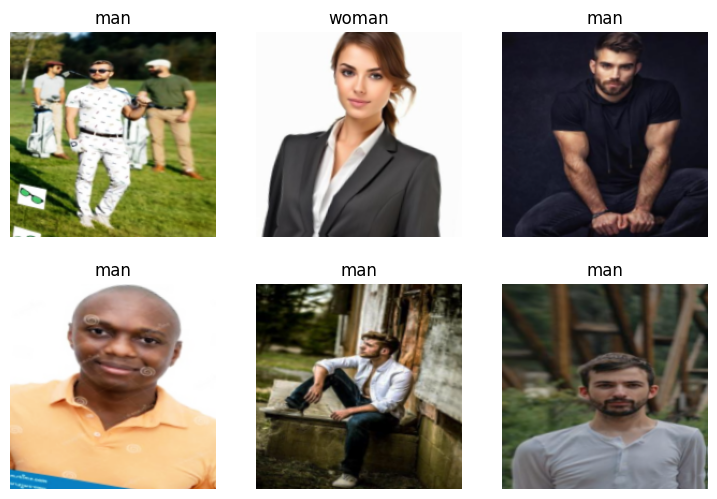

In [28]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #our input is image and our output is categorycal
    get_items=get_image_files, #tell fast ai to search for images 
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # split the data into test and validation(test) (80% training and 20% validation) , seed=42 ensure the function to five same split every time
    get_y=parent_label, #tell to get label from folder name 
    item_tfms=[Resize(192, method='squish')], #resize before using and squish the images for resizing
    batch_tfms=aug_transforms(mult=1.0)  # adds random flips, zoom, warp, lighting(Data Augmentation)
).dataloaders(path, bs=32) #make dataloaders from data blochs with batch size 32

dls.show_batch(max_n=6)#show a 6 random images from training data

In [29]:
from fastai.losses import CrossEntropyLossFlat
from fastai.callback.tracker import EarlyStoppingCallback
learn = vision_learner(dls, resnet18, metrics=error_rate,loss_func=CrossEntropyLossFlat(label_smoothing=0.1))#use ResNet-18 pretrained model on our data and use error rate as metric 
learn.fine_tune(100,base_lr=1e-4,cbs=EarlyStoppingCallback(monitor='valid_loss', patience=3)) #doing this 10 pochs and if there was no decreaing for validation loss after 3 epoch stop 

epoch,train_loss,valid_loss,error_rate,time
0,1.241589,0.744252,0.337778,00:55


epoch,train_loss,valid_loss,error_rate,time
0,1.131425,0.693641,0.320000,01:08
1,1.058077,0.649056,0.297778,01:05
2,1.019537,0.617957,0.253333,01:07
3,0.974123,0.594063,0.222222,01:06
4,0.918711,0.568275,0.226667,01:06
5,0.885810,0.546935,0.222222,01:14
6,0.863024,0.530267,0.217778,01:15
7,0.804689,0.510402,0.191111,01:09
8,0.802764,0.485930,0.186667,01:06
9,0.765027,0.466185,0.177778,01:06


No improvement since epoch 22: early stopping


In [ ]:
learn.export('model.pkl')#save the model